# Lab #6 - Radiation Distance 1 (Feb 11)

**Student name:** Liam Murray \
**Student number:** 87357539 \
**Partner:** Alexis Bushfield

Scope number: 13 \
Source number: 16

## Section 1: Familiarize
In this stage we get familiar with the equipment, the analysis procedure, and to get a clear big-picture view of the experiment. This will help the rest of the experiment go more smoothly and you will be able to make informed decisions.

### Experimental Goal 🎯:
> Find a model for the rate of radiation observed by a detector as a function of the distance from the source.  


## Section 2: Investigate
This is the body of our experiment. We will iterate the following until we run out of time. At the end of each iteration we will try to make sense of our data in order to make an informed decision on how best to improve. 

#### Investigate: Measure and Analyze
Here we collect the data and run our analysis. Thanks to our spreadsheets, we can often do the analysis in real time and make on-the-fly decisions on how to best proceed. We will be mindful when we set up our spreadsheet to accommodate additional data. Some questions to ask ourselves when writing in our lab books are: 
- What did we actually do? 
- Did anything unexpected go wrong? 
- What happened? 
- Any qualitative observations on either our data or analysis? 
- How did the trends in our plots change as a result? 
- How did our uncertainty change as a result?

**Measurement Plan:**
1. Using scope, take measurements of radiation counts over 90 seconds at distances between 1 and 10 cm in 1 cm increments. 
2. One partner will control the Geiger counter while timing on their cellphone.
3. Counts will be recorded in the data table, with the uncertainties calculated below:
    - The largest uncertainty is in time, because of human error. We can calulate this uncertainty with a Gaussian PDF with a 95% Confidence Interval of $\pm 1$ second, resulting in $u[t] = \frac{2 \ \text{sec}}{4} = 0.5 \ \text{sec}$.
    - Uncertainty in the rate was calculated using the following equation from Canvas:
    $$(\frac{u[C]}{C})^2 = (\frac{u[A]}{A})^2 + (\frac{u[B]}{B})^2$$



In [1006]:
# Original File name: linearfit_errors.ipynb
# suggested  Mods by Garith Smith April 2023
# Fitting a line to data with errors
# Analytically find the best fitting parameters of a linear fit to the data through the method of ordinary least squares estimation. (i.e. find m and b for y = m*x + b)
# Based on:
# https://github.com/anazalea/phys2300stuff/tree/master/climateData
# https://github.com/anazalea/phys2300stuff/blob/master/climateData/climateChange.ipynb

## Iterative Fitting

**Purpose:** This notebook will read a .csv file (comma-separated variables), and plot the data.
It will then use  ***iterative fitting*** to find the best fit of a specified function to the data.
It will provide a $\chi^2$ value  and a residuals plot to help diagnose the goodness-of-fit.

**How to use:** Duplicate this notebook, or copy and paste the relevant code cells into a new notebook. Remove the "explanation" markdown cells, and replace them with your own markdown cells for your lab report. Make sure you understand what the python code is doing at each step.

## Setup and Data Entry:

First, import numpy (standard scientific/numerical python library) and matplotlib (standard plotting python library).

In [1007]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%matplotlib inline

Now lets import our data from a .csv file (comma-separated variables). Some tips:
- Change the name of the *datafile* so it points to the .csv file with your data.
- Make sure that the .csv file is in the same folder as this notebook, or that you specify the absolute path.
- If you have a header line in your .csv file, make sure it has a # in front of it.

In [1008]:
#Identifying and reading the data
datafile = "Round 1 Data.csv"
data = np.genfromtxt(datafile, delimiter=",", dtype=float)


Lets create a vector of values (a.k.a. a 1-dimensional numpy array) for each column of the .csv file. These vectors let us do calculations on every data point at once, similar to applying an excel formula to every value in a column.

In [1009]:
#Making Vectors from the data
distance = data[:, 0]  # Make a vector of all elements (:) in the first column (0)
time = data[:, 1]  # Make a vector of all elements in the second column
counts = data[:, 2]  # Make a vector of all elements in the third column

x_var=distance[0:19]     # Creates the xvar vector
y_var= counts[0:19]/time[0:19]  # Creates the yvar (rate) vector
dCount = np.sqrt(counts[0:19])
dTime = 0.5
# Enter the formula for the uncertainty in the rate using N, t, and their uncertainties dN and dt.
y_uncertainty= y_var * np.sqrt((dCount/counts[0:19])**2 + (dTime/time[0:19])**2)

print(np.min(y_var), np.max(y_var))


1.873594803897077 135.3748855787634


## Plotting:

In this case, we will simply use the columns of the .csv file, but in the future you can do some pre-processing calculations at this stage.

Let's add the axis labels, plot title, and the lower and upper limits for the plot axes.

In [1010]:
#Preparing the Plots
x_label = "Distance from source (cm)"
y_label = "Rate of radiation"
title = "Detected radiation rate "
xmin = 0
xmax = 10
ymin = 0
ymax = 80

Now lets make a graph of y_var vs. x_var, with error bars on the y data.

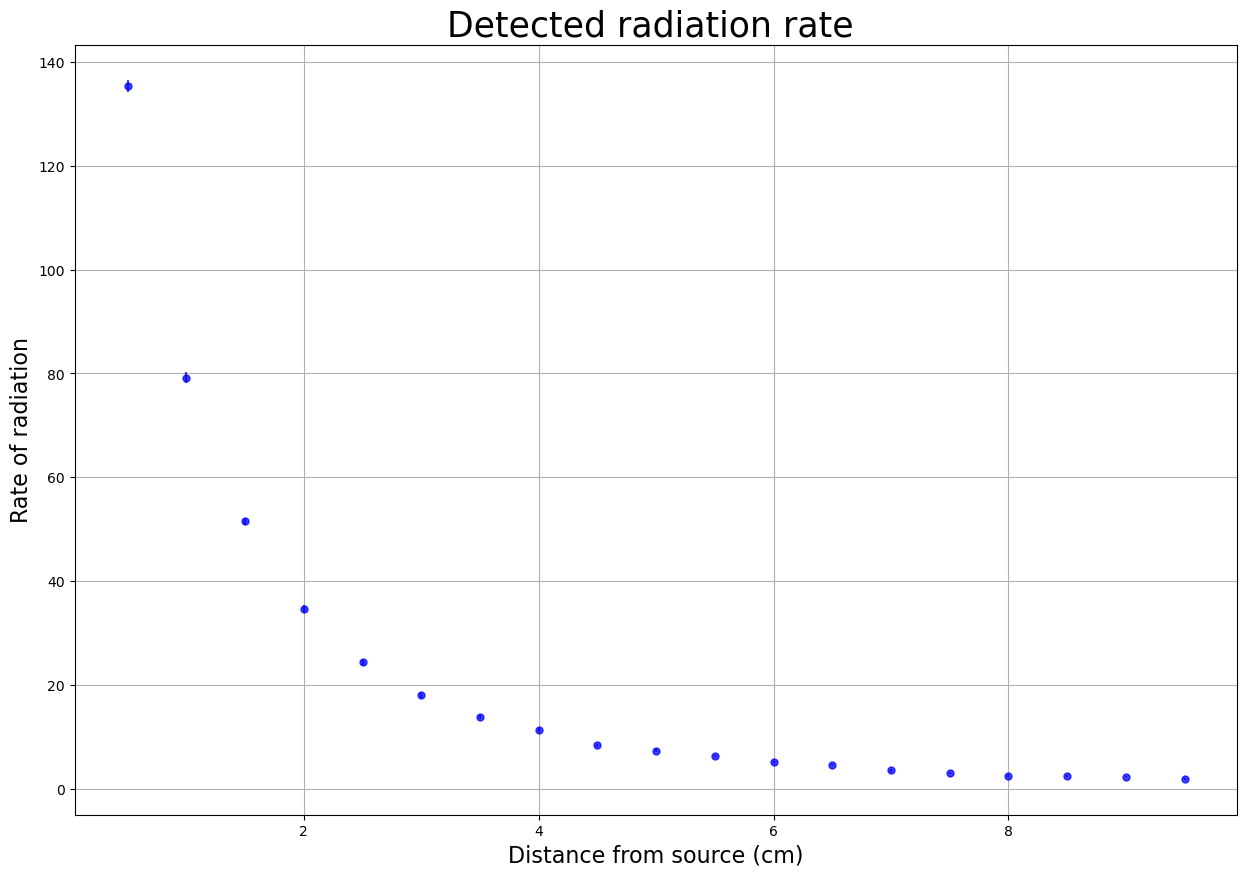

In [1011]:
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# To manually change the axis limits, uncomment (remove the # at the start) these lines:
#plt.ylim(ymin, ymax)  # This sets the range of the y-axis
#plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot", bbox_inches="tight", dpi=300)  # Saves the figure

## Iterative Fitting:

This section fits the data with a specified model.
You can choose any function to be your model; the currently set function is a linear function.
The iterative fitting algorithm repeatedly guesses the fit parameters, using the method of gradient descent to improve on the previous guess until it converges to a satisfactory fit. 

This block defines the mathematical function which will be used to fit the data. Here it is set to a linear function where the parameter $a$ is the slope and $b$ is the y-intercept. The values of the parameters are not set; the fitter will find the values for these parameters which best fit the data.

In [1012]:
def FitFunction(x, a, b,c):
    y = a*np.exp(-b*x)+c # Original Fit Function
    return y

n_parameters = 3

Before we use this function to fit our data, we need to set up the fitting routine. We can optionally provide the following pieces of information to help out the fitter:

- A list of lower and upper bounds for the parameters
- A list of initial guesses for the parameters.

Currently the parameter lower bounds and upper bounds (param_bounds) are set to -/+ infinity (np.inf), and the guesses (initial_param) are both set to 1. (You can set each bound and parameter manually; for example for three parameters: initial_guesses = (100, 5, 3).)

In [1013]:
#Parameter Bounds ([lower bounds,...],[Upper bounds,...])
param_bounds=([-np.inf,-np.inf],[np.inf,np.inf])  
initial_param=(100,1,1)  

Now we tell python to try to fit our function to the data, and also calculate errors on each parameter.

In [1014]:
optimized_parameters, covariance_matrix = curve_fit(FitFunction, x_var,y_var,
                                                    sigma=y_uncertainty,absolute_sigma=True,
                                                    bounds=param_bounds,p0=initial_param)
parameter_errors = np.sqrt(np.diag(covariance_matrix))

Finally we print out the best fit parameters and their errors.

In [1015]:
for i in range(len(optimized_parameters)):
    print(f'Parameter #{i+1}: {optimized_parameters[i]:.6e} ± {parameter_errors[i]:.1e}')

Parameter #1: 1.828630e+02 ± 1.9e+00
Parameter #2: 8.197675e-01 ± 6.6e-03
Parameter #3: 2.682738e+00 ± 6.2e-02


## Plotting the fit results:

To display the best fit function, we start by defining a range of x values for which to plot the function. We then create an array of 200 points within this x range. For each point, we use the best fit parameters from the previous section to calculate the y value of the function at that point.

In [1016]:
# First calculate a reasonable range of x values for our line
x_length = max(x_var) - min(x_var)
x_min_l = min(x_var) - 0.05*x_length
x_max_l = max(x_var) + 0.05*x_length
# Create our array of 200 linearly-spaced points
xForLine = np.linspace(x_min_l,x_max_l,200)
# Calculate the y values of the best fit line
yForLine = FitFunction(xForLine,*optimized_parameters)

Now we are ready to plot the fit function with our data. We repeat the code to plot the previous graph, and then plot our fit function.

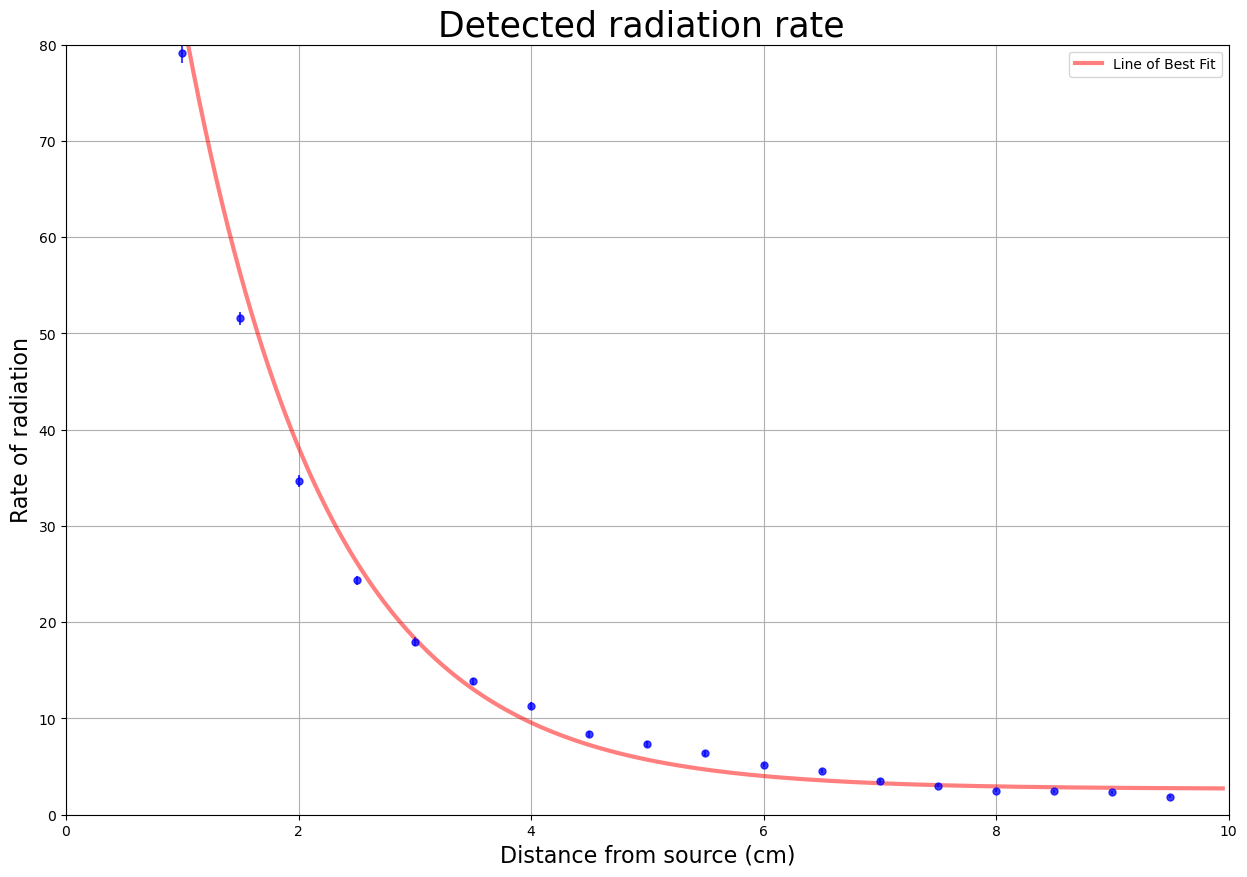

In [1017]:
# Plot our data
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# To manually change the axis limits, uncomment (remove the # at the start) these lines:
plt.ylim(ymin, ymax)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis

# Add the line to the plot
plt.plot(xForLine, yForLine, lw=3, color="red", alpha=0.5, label="Line of Best Fit")

# Add a legend
plt.legend()
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_fit", bbox_inches="tight", dpi=300)  # Saves the figure

## Diagnosing the goodness-of-fit:

Now lets calculate the residual for each data point, i.e. the difference between the data and the fit function.

In [1018]:
residual = y_var - FitFunction(x_var,*optimized_parameters)
print(np.min(residual), np.max(residual))

-4.584863726523345 11.320991454896856


Lets plot the residuals graph. Recall that the residuals should be evenly distributed around zero, and there should be no visible trend or pattern in the residuals. Approximately 68% of the error bars should cross zero, and 95% of data points should be within two error bars of zero.

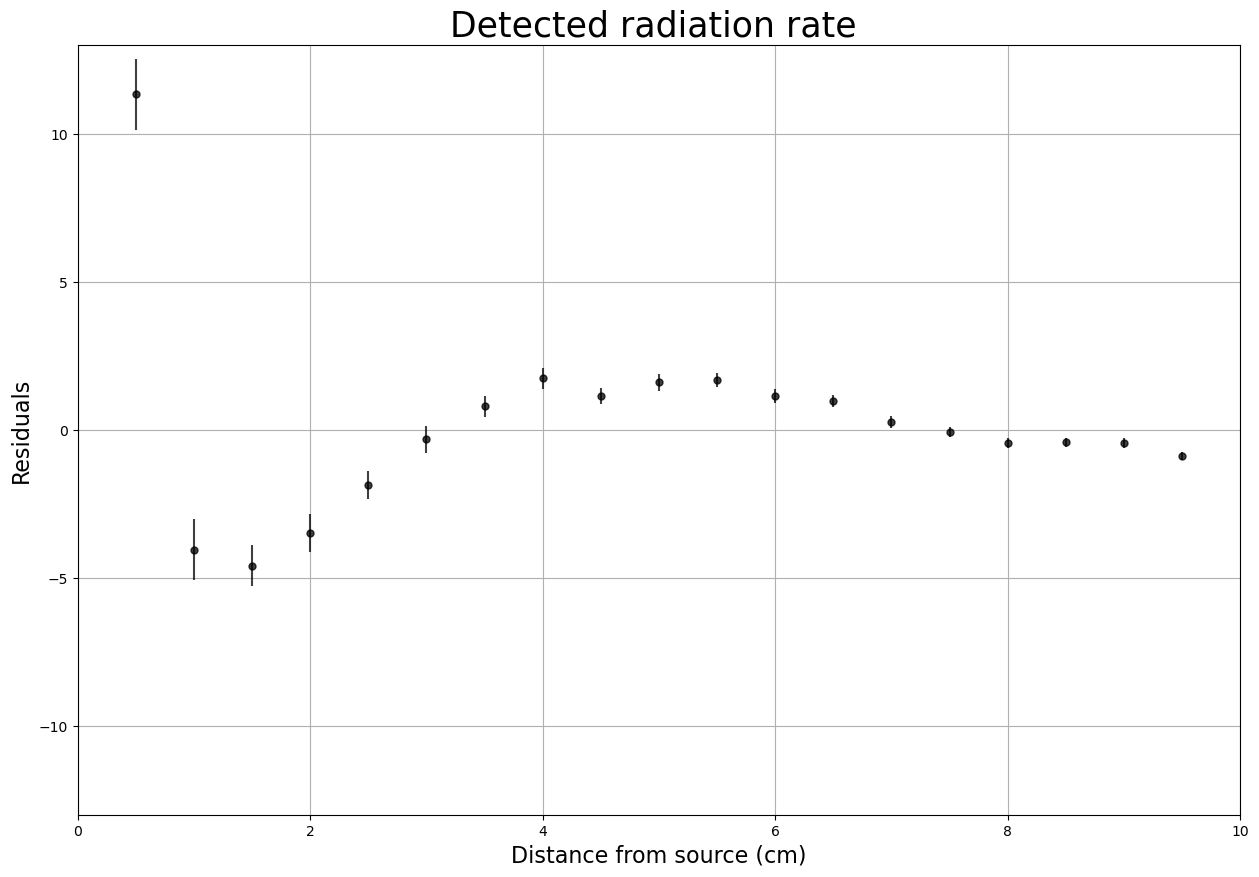

In [1019]:
# Plot the residuals
plt.errorbar(x_var, residual, yerr=y_uncertainty, fmt="o", ms=5, color="black", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel("Residuals", fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# Set the axis limits for the residuals plot
ymin_r=-13
ymax_r=13
plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_residuals", bbox_inches="tight", dpi=300)  # Saves the figure

Lets also calculate the $\chi^2$ value for our fit. This indicates the goodness-of-fit:
- $\chi^2>>1$ indicates the model is not a good fit to the data, or uncertainties are likely underestimated.
- $\chi^2\sim1$ indicates the model is a good fit to the data.
- $\chi^2<<1$ indicates the model is "too good" a fit, i.e. the uncertainties are likely overestimated.

In [1020]:
ndof = len(x_var) - len(optimized_parameters) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
ru = residual / y_uncertainty
chisq = np.sum(np.power(ru, 2)) / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

rel = 100*(parameter_errors[1] / optimized_parameters[1])
print(rel)

Chisq 29.7996
0.8025522398218123


### Summary of Round 1
We collected data, and were able to successfully create a model that fit our data to a sufficient level. Analytical scores of $\chi^2 = 15.6497$ reinforce the visual connection between our model and data. We found that our data followed a trend described by the equation $y = ae^{-bt}+c$, displaying the characteristics of exponential decay as the distance increased. Our final model has the equation: $152.19 \cdot e^{-0.74 \cdot t} + 2.495$.

Our plans for improvement are to take more data samples, so we have every 0.5 cm within the interval from 0.5 to 9.5 cm. We are also going to increase our timing to 120 seconds to increase the accuracy of our calculated rate.

### Summary of Round 2
Our results from this round showed unexpected behaviour, as our $\chi^2$ increased to $29.7996$. The data still shares the exponential decay behaviour with our model, and has a relative uncertainty of $0.8 \%$.

Our parameters were as follows:
Parameter #1: 182.86 ± 1.9
Parameter #2: 0.8198 ± 6.6e-03
Parameter #3: 2.683 ± 6.2e-02

We collected more data points, implementing our plan for improvement. Our results showed a clear pattern within our residuals, which indicates that our model may be inappropriate for our data.

Plans for improvement include re-taking our data for each round cm over 120 seconds, and using a Semilog plot and model to best represent our data.

**Comparison with Aaliyah and Mia**
Aaliyah and Mia followed the same measurement strategy as Alexis and I. Both groups agree that our models fit the data poorly.
Their first parameter was 178.5 $\pm$ 1.8 with a relative uncertainty of 1.0%, their second was 0.8406 $\pm$ 0.0066 with a relative uncertainty of 0.79%, and their third was 2.843 $\pm$ 0.058 with a relative uncertainty of 2.0%. Their residuals clearly showed a trend, with a $\chi^2 = 37.9$, supporting the claim that the model was poorly designed for the data.

# Lab #7 - Radiation Distance 2 (Feb 25)

**Student name:** Liam Murray \
**Student number:** 87357539 \
**Partner:** Alexis Bushfield

Scope number: 13 \
Source number: 16

**Experimental Goal**
> Find a justified model for the rate of radiation observed by a detector as a function of the distance from the source.  Justified means there is a physics basis for the model and each of its parameters. 

**Measurement Strategy** \
We are using the same measurement strategy as Lab 6, but we are increasing the length of each measurement to 2.5 minutes (150 seconds).
1. Using scope, take measurements of radiation counts over 150 seconds at distances between 1 and 10 cm in 1 cm increments. 
2. One partner will control the Geiger counter while timing on their cellphone.
3. Counts will be recorded in the data table, with the uncertainties calculated below:
    - The largest uncertainty is in time, because of human error. We can calulate this uncertainty with a Gaussian PDF with a 95% Confidence Interval of $\pm 1$ second, resulting in $u[t] = \frac{2 \ \text{sec}}{4} = 0.5 \ \text{sec}$.
    - Uncertainty in the rate was calculated using the following equation from Canvas:
    $$(\frac{u[C]}{C})^2 = (\frac{u[A]}{A})^2 + (\frac{u[B]}{B})^2$$

**Modeling our data** \
Using our previous knowledge from Phys 119, we know that we must account for background radiation. Because of this, we are using the Inverse Square Law as the basis of our model with the equation below, where $R$ is the rate, $A$ is the attenuation rate, $d$ is the distance from the source to the detector, and $C$ is the background radiation rate.
$$R(d) = \frac{A}{d^2}+C$$

## Iterative Fitting:

In [1021]:
#Identifying and reading the data
datafile = "Round 1 Data.csv"
data = np.genfromtxt(datafile, delimiter=",", dtype=float)

#Making Vectors from the data
distance = data[:, 0]  # Make a vector of all elements (:) in the first column (0)
time = data[:, 1]  # Make a vector of all elements in the second column
counts = data[:, 2]  # Make a vector of all elements in the third column

x_var=distance     # Creates the xvar vector
y_var= counts/time  # Creates the yvar (rate) vector
dCount = np.sqrt(counts)
dTime = 0.5
# Enter the formula for the uncertainty in the rate using N, t, and their uncertainties dN and dt.
y_uncertainty= y_var * np.sqrt((dCount/counts)**2 + (dTime/time)**2)

print(np.min(y_var), np.max(y_var))

1.873594803897077 135.3748855787634


This section fits the data with a specified model.
You can choose any function to be your model; the currently set function is a linear function.
The iterative fitting algorithm repeatedly guesses the fit parameters, using the method of gradient descent to improve on the previous guess until it converges to a satisfactory fit. 

This block defines the mathematical function which will be used to fit the data. Here it is set to a linear function where the parameter $a$ is the slope and $b$ is the y-intercept. The values of the parameters are not set; the fitter will find the values for these parameters which best fit the data.

In [1022]:
def FitFunction(x, a, b, c):
    y1 = a/(x**2) + c
    y2 = a/((x + b)**2) + c # Original Fit Function
    return y2

n_parameters = 3

Before we use this function to fit our data, we need to set up the fitting routine. We can optionally provide the following pieces of information to help out the fitter:

- A list of lower and upper bounds for the parameters
- A list of initial guesses for the parameters.

Currently the parameter lower bounds and upper bounds (param_bounds) are set to -/+ infinity (np.inf), and the guesses (initial_param) are both set to 1. (You can set each bound and parameter manually; for example for three parameters: initial_guesses = (100, 5, 3).)

In [1023]:
#Parameter Bounds ([lower bounds,...],[Upper bounds,...])
param_bounds=([-np.inf,-np.inf],[np.inf,np.inf])  
initial_param=(100,1,1)  

Now we tell python to try to fit our function to the data, and also calculate errors on each parameter.

In [1024]:
optimized_parameters, covariance_matrix = curve_fit(FitFunction, x_var,y_var,
                                                    sigma=y_uncertainty,absolute_sigma=True,
                                                    bounds=param_bounds,p0=initial_param)
parameter_errors = np.sqrt(np.diag(covariance_matrix))

Finally we print out the best fit parameters and their errors.

In [1025]:
for i in range(len(optimized_parameters)):
    print(f'Parameter #{i+1}: {optimized_parameters[i]:.6e} ± {parameter_errors[i]:.1e}')

Parameter #1: 3.122070e+02 ± 4.0e+00
Parameter #2: 1.006831e+00 ± 1.2e-02
Parameter #3: -1.116270e+00 ± 6.2e-02


## Plotting the fit results:

To display the best fit function, we start by defining a range of x values for which to plot the function. We then create an array of 200 points within this x range. For each point, we use the best fit parameters from the previous section to calculate the y value of the function at that point.

In [1026]:
# First calculate a reasonable range of x values for our line
x_length = max(x_var) - min(x_var)
x_min_l = min(x_var) - 0.05*x_length
x_max_l = max(x_var) + 0.05*x_length
# Create our array of 200 linearly-spaced points
xForLine = np.linspace(x_min_l,x_max_l,200)
# Calculate the y values of the best fit line
yForLine = FitFunction(xForLine,*optimized_parameters)

Now we are ready to plot the fit function with our data. We repeat the code to plot the previous graph, and then plot our fit function.

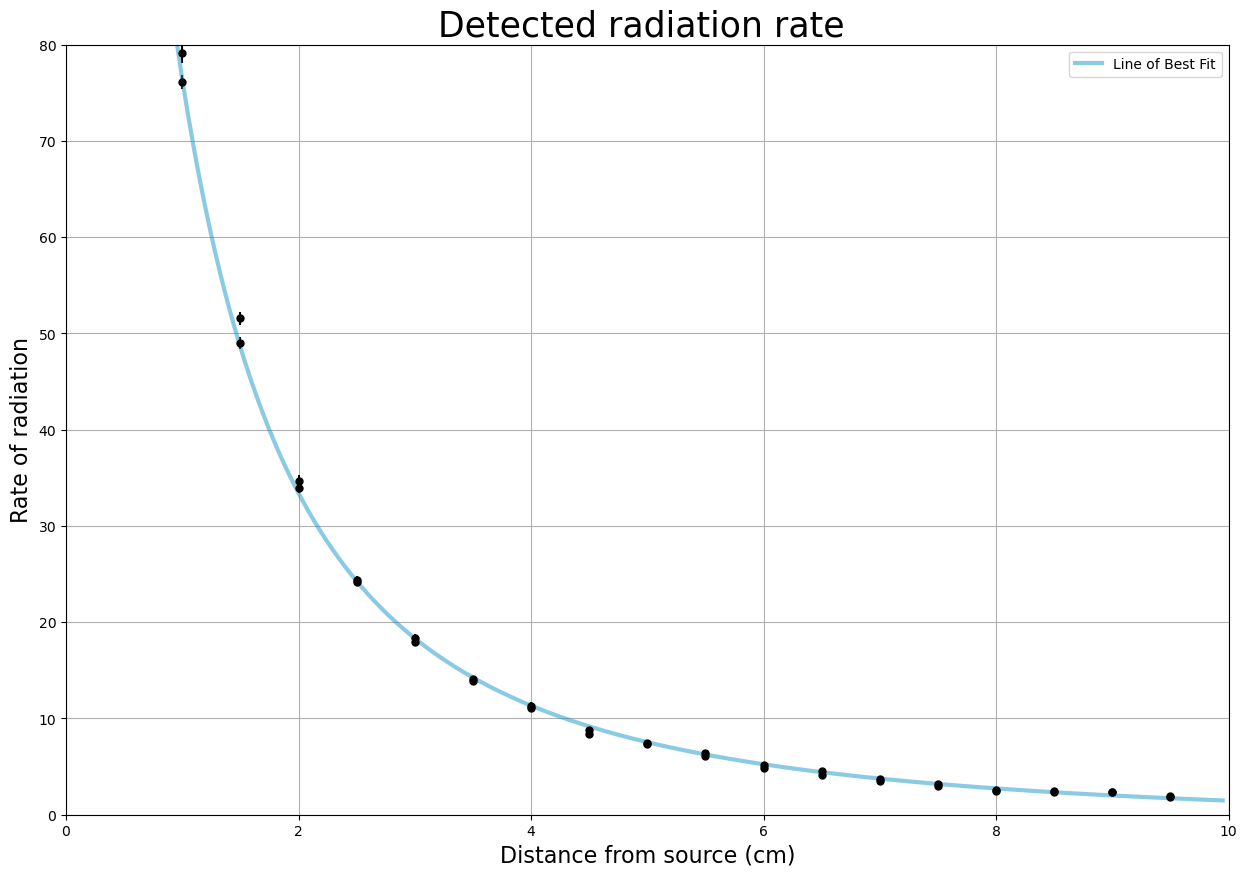

In [1027]:
# Plot our data
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="black", alpha=1)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# To manually change the axis limits, uncomment (remove the # at the start) these lines:
plt.ylim(ymin, ymax)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis

# Add the line to the plot
plt.plot(xForLine, yForLine, lw=3, color="#1798C9", alpha=0.5, label="Line of Best Fit")

# Add a legend
plt.legend()
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_fit", bbox_inches="tight", dpi=300)  # Saves the figure

## Diagnosing the goodness-of-fit:

Now lets calculate the residual for each data point, i.e. the difference between the data and the fit function.

In [1028]:
residual = y_var - FitFunction(x_var,*optimized_parameters)
print(np.min(residual), np.max(residual))

-1.7346877806498924 3.0010091218181856


In [1029]:
A = -1.116270
B = 0.166
dA = 6.2e-02
dB = 10
tprime = (np.abs(A - B))/(np.sqrt((dA)**2 + (dB)**2))

print("T' = ", tprime)

T' =  0.12822453554810992


Lets plot the residuals graph. Recall that the residuals should be evenly distributed around zero, and there should be no visible trend or pattern in the residuals. Approximately 68% of the error bars should cross zero, and 95% of data points should be within two error bars of zero.

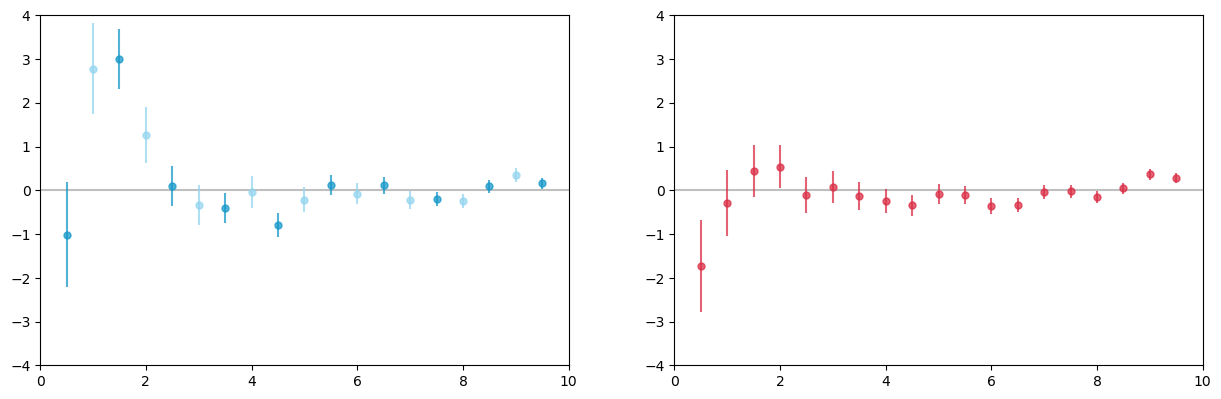

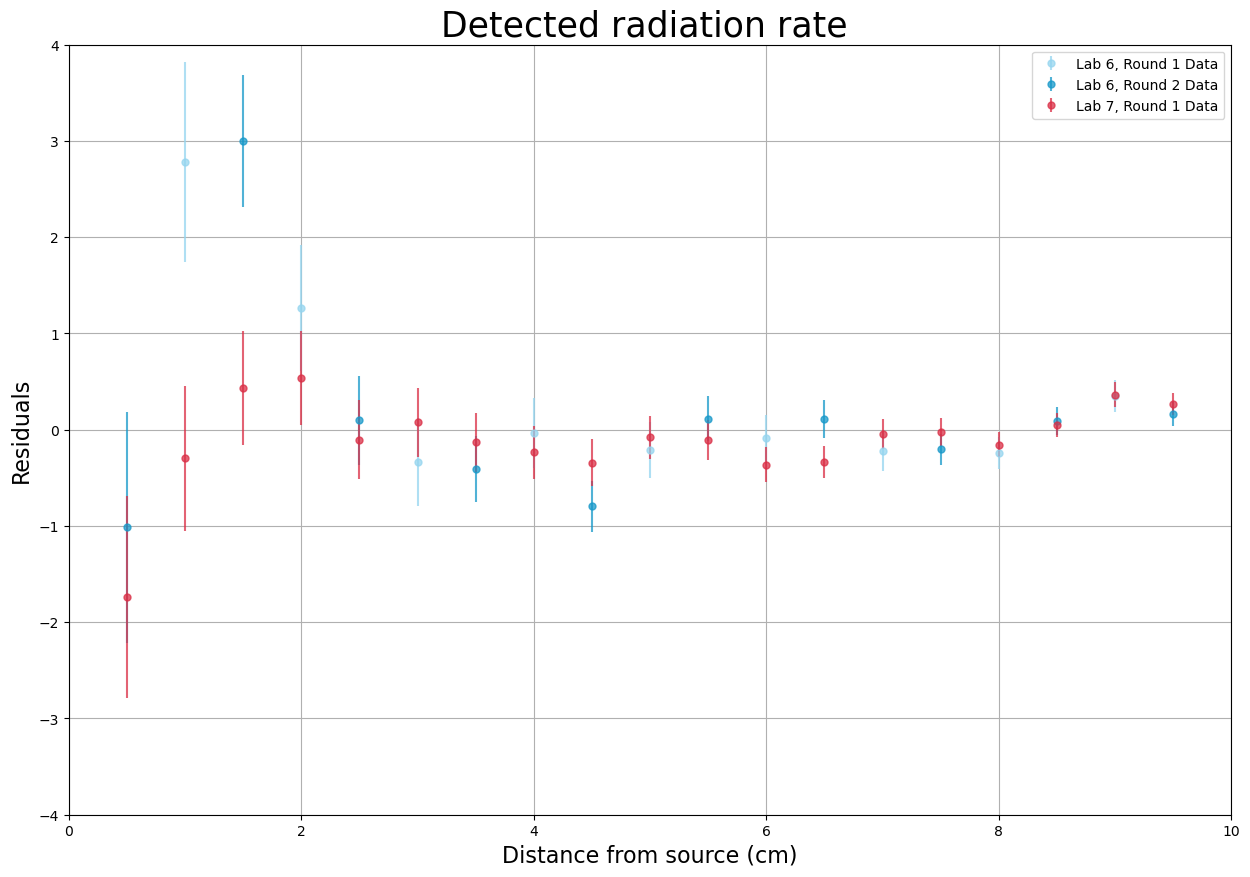

In [1030]:
plt.gcf().set_size_inches(15, 10)
# Set the axis limits for the residuals plot
ymin_r=-4
ymax_r=4


plt.subplot(2, 2, 1)
plt.hlines(xmin=0,xmax=10,y=0, color="black", alpha=0.25)
plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.errorbar(x_var[0:9], residual[0:9], yerr=y_uncertainty[0:9], fmt="o", ms=5, color="#95D5EF", alpha=0.75, label="Lab 6, Round 1 Data")
plt.errorbar(x_var[9:19], residual[9:19], yerr=y_uncertainty[9:19], fmt="o", ms=5, color="#1798C9", alpha=0.75,label="Lab 6, Round 2 Data")

#### SECOND SUBPLOT
plt.subplot(2, 2, 2)
plt.hlines(xmin=0,xmax=10,y=0, color="black", alpha=0.25)
plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.errorbar(x_var[19:40], residual[19:40], yerr=y_uncertainty[19:40], fmt="o", ms=5, color="#DA2F46", alpha=0.75,label="Lab 7, Round 1 Data")
plt.figure()
# Plot the residuals
plt.errorbar(x_var[0:9], residual[0:9], yerr=y_uncertainty[0:9], fmt="o", ms=5, color="#95D5EF", alpha=0.75, label="Lab 6, Round 1 Data")
plt.errorbar(x_var[9:19], residual[9:19], yerr=y_uncertainty[9:19], fmt="o", ms=5, color="#1798C9", alpha=0.75,label="Lab 6, Round 2 Data")
plt.errorbar(x_var[19:40], residual[19:40], yerr=y_uncertainty[19:40], fmt="o", ms=5, color="#DA2F46", alpha=0.75,label="Lab 7, Round 1 Data")

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel("Residuals", fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# Set the axis limits for the residuals plot

plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.legend()
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_residuals", bbox_inches="tight", dpi=300)  # Saves the figure

Lets also calculate the $\chi^2$ value for our fit. This indicates the goodness-of-fit:
- $\chi^2>>1$ indicates the model is not a good fit to the data, or uncertainties are likely underestimated.
- $\chi^2\sim1$ indicates the model is a good fit to the data.
- $\chi^2<<1$ indicates the model is "too good" a fit, i.e. the uncertainties are likely overestimated.

In [1031]:
ndof = len(x_var) - len(optimized_parameters) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
ru = residual / y_uncertainty
chisq = np.sum(np.power(ru, 2)) / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

rel = 100*(parameter_errors[1] / optimized_parameters[1])
print(rel)

Chisq 2.5442
1.1676317623884387


### Summary of Round 1
Our results from this round were highly unexpected as our model was visually a poor fit. Uur $\chi^2$ increased to 539.37, which is a strong indicator that we are missing a behaviour in our model to account for further experimental obstacles. The data still shares the exponential decay behaviour with our model, and has a relative uncertainty that could not be calculated (Python returned inf).

Our parameters were as follows: \
Parameter A: 41.78 ± inf \
Parameter C: 3.62 ± inf

**Plan for Improvement** \
To improve our results, we plan to include a new parameter $B$. This are intended to account for equipment errors, which includes how the scope is designed to detect emissions (which results in loss readings as the distance increases).
We are going to use a new model that accounts for this, in which our equation will be
$$R(x) = \frac{A}{(x-B)^2}+C$$

### Summary of Round 2
The results of this round were much better than Round 1. Notable values were a massive decrease in $\chi^2$ from 539.37 to 2.54, accompanied by a significantly more accurate fit when assessed visually. Our relative uncertainty is quite low (noted below), and our residuals have decreased from Lab 6 data and our initial model during this lab. There is still a pattern in our residuals, however we reason this behaviour is due to our model being based on the assumption that we are measuring a perfect point source with even isotropic emissions, however this is not the case as these assumptions are not true at small distances (ex. the "perfect point" becomes a disk, and there are interactions with the scope's lens that result in changes).

Our parameters were as follows: \
Parameter A: 312.2 ± 4.0 \
Parameter B: 1.007 ± 0.012 \
Parameter C: -1.116 ± 0.062
Their relative uncertainties were:
Parameter #1: 1.28%
Parameter #2: 1.17%
Parameter #3: 5.56%

We completed a T' analysis on our calculated and experimentally determined background radiation rate. We calculated the rate recorded as $$\frac{100 \ \text{counts}}{10.15 \ \text{min} \cdot 60 \ \text{seconds}} = 0.166 \ \text{counts/sec},$$ this was used in the T' code with Parameter C to recieve a score of 0.128 which reinforces that there is high similarity between the two values.
When we compare this model to our Lab 6 exponential model, we can theorize that our choice to use an exponential function expected an "ideal" behaviour of our source that wasn't realistic, due to all of the factors that affect our measurements of radiation.

**Comparison with Mia and Aaliyah**
Our groups methodology was quite similar, as they took data at 0.5 cm increments over 180 seconds. Their model fit their data similarly to ours, with a good visual fit and $\chi^2 = 2.5$.

### Experimental Summary
Overall, we can make an educated recommendation that the model $R(x) = \frac{A}{(x-B)^2}+C$ is acceptable for radiation measurements over a distance when not in close ranges, and it is supported by the Inverse-square law in Physics. We achieved the experimental goal to "Find a justified model for the rate of radiation observed by a detector as a function of the distance from the source.", as we provided a physics basis for each parameter and function.